In [1]:
# import thư viện
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Đặt số lượng hàng tối đa để hiển thị
pd.set_option("display.max_rows", 1500)
# Đặt số lượng cột tối đa để hiển thị 
pd.set_option("display.max_columns", 50)

In [5]:
# Đưa dữ liệu vào
data = pd.read_csv('attrition.csv')

In [6]:
#xóa các cột giá trị không thay đổi
data_clean = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [7]:
data_clean.shape

(1470, 32)

In [8]:
# Chuyển đổi biến phân loại
label_encoders = {}
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 
                       'JobRole', 'MaritalStatus', 'OverTime']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_clean[column] = label_encoders[column].fit_transform(data_clean[column])

In [10]:
data_clean.head(100)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
5,5,32,0,1,1005,1,2,2,1,4,1,79,3,1,2,4,2,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6
6,6,59,0,2,1324,1,3,3,3,3,0,81,4,1,2,1,1,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0
7,7,30,0,2,1358,1,24,1,1,4,1,67,3,1,2,3,0,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0
8,8,38,0,1,216,1,23,3,1,4,1,44,2,3,4,3,2,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8
9,9,36,0,2,1299,1,27,3,3,3,1,94,3,2,0,3,1,5237,16577,6,0,13,3,2,2,17,3,2,7,7,7,7


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   Attrition                 1470 non-null   int32
 3   BusinessTravel            1470 non-null   int32
 4   DailyRate                 1470 non-null   int64
 5   Department                1470 non-null   int32
 6   DistanceFromHome          1470 non-null   int64
 7   Education                 1470 non-null   int64
 8   EducationField            1470 non-null   int32
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [12]:
#Kiểm tra độ tương quan của các biến
data_clean.corr()['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
Unnamed: 0                 -0.010369
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [13]:
sorted_corr=data_clean.corr()['Attrition'].sort_values(ascending = False)
# Lấy các cột có tương quan không âm
positive_corr_cols = sorted_corr[sorted_corr >= 0].index.tolist()
# Drop các cột có tương quan âm từ DataFrame 'ch'
data_new = data_clean.drop(columns=set(data_clean.columns) - set(positive_corr_cols))
print("Data sau khi loại bỏ các cột có tương quan âm với 'Attrition':")
data_new.head()

Data sau khi loại bỏ các cột có tương quan âm với 'Attrition':


,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating
0,1,2,2,1,1,0,7,2,19479,8,1,3
1,0,1,1,8,1,1,6,1,24907,1,0,4
2,1,2,1,2,4,1,2,2,2396,6,1,3
3,0,1,1,3,1,0,6,1,23159,1,1,3
4,0,2,1,2,3,1,2,1,16632,9,0,3


In [14]:
data_new.shape

(1470, 12)

In [15]:
#Chia dữ liệu
X = data_new.drop(columns=['Attrition'])
y = data_new['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
#Kiểm tra dữ liệu có cân bằng không trước khi training mô hình
print('Dữ liệu trước khi cân bằng')
y.value_counts()

Dữ liệu trước khi cân bằng


Attrition
0    1233
1     237
Name: count, dtype: int64

In [17]:
# Cân bằng dữ liệu bằng kỹ thuật SMOTE:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)
print('Dữ liệu sau khi cân bằng:',y_smote.value_counts())

Dữ liệu sau khi cân bằng: Attrition
1    1233
0    1233
Name: count, dtype: int64


In [18]:
#Chuẩn hóa dữ liệu bằng Min-Max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_scaled = scaler.fit_transform(x_smote)

In [19]:
# Huấn luyện mô hình Naive Bayes
model = GaussianNB()
model.fit(x_smote, y_smote)

GaussianNB()

Accuracy: 0.5102040816326531
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.49      0.63       370
           1       0.19      0.61      0.28        71

    accuracy                           0.51       441
   macro avg       0.53      0.55      0.46       441
weighted avg       0.76      0.51      0.57       441

Confusion Matrix:


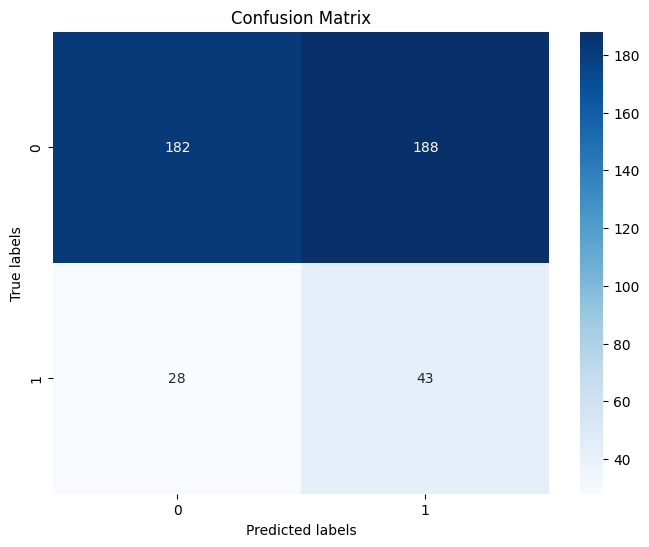

In [20]:
# Đánh giá mô hình trên tập test
import seaborn as sns
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

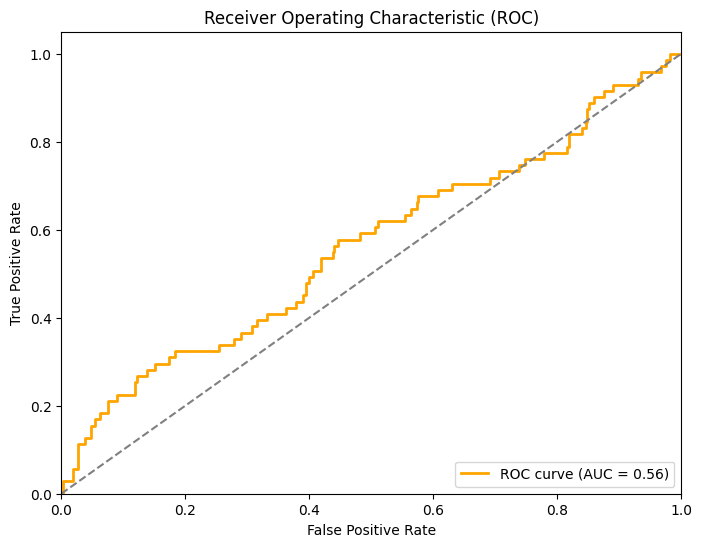

AUC: 0.5622382946326608


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Dự đoán xác suất thuộc lớp positive
y_prob = model.predict_proba(X_test)[:, 1]

# Tính toán ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc}')